---
<h1 align="center"><strong>Ask Your Web Pages Using Mistral-7b & LangChain</strong></h1>
<h4 align="center"><strong>Nour Eddine Zekaoui</strong></h4>

---

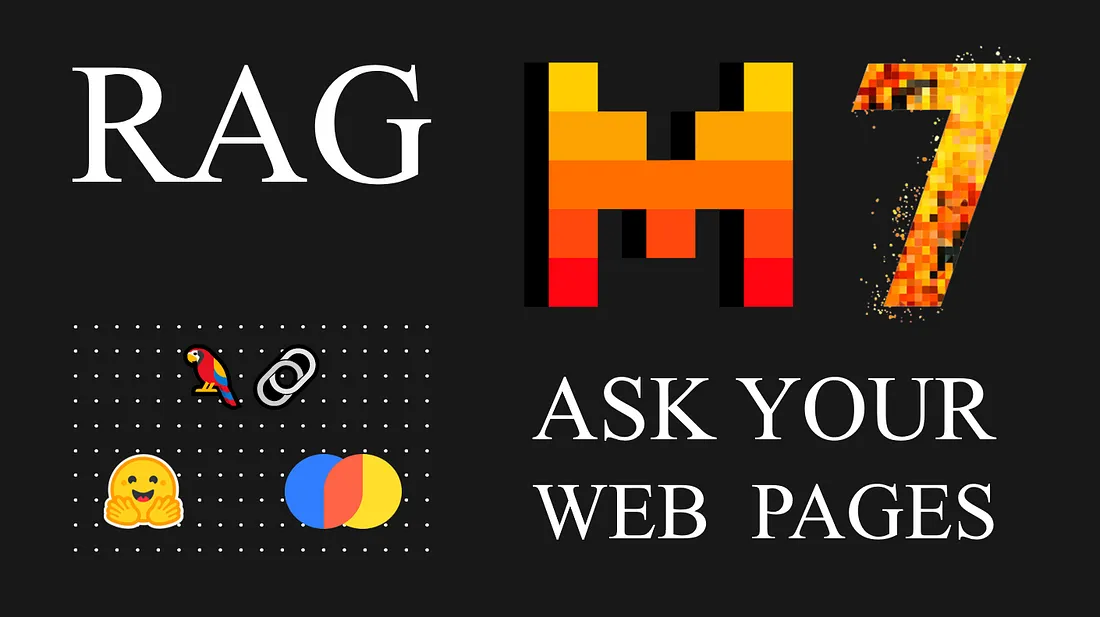

### **Introduction**

How can you augment LLMs with data they weren't trained on? **Retrieval Augmented Generation (RAG)** is the way to go. Let me explain what it means and how it actually works.

Let's say that you've got your own dataset for example documents of text from your company. How can you make **ChatGPT** and other LLMs learn about it and answer questions?

Well this can easily be done in four steps:

1. **Embedding:**
Embed your documents with an embedding model like **text-embedding-ada-002** from OpenAI or **S-BERT**. Embedding a document means transforming its sentences or chunk of words into a vector of numbers. The idea is that sentences that are similar to each other should be close in terms of distance between its vectors and sentences that are different should be further away.

2. **Vector Store:**
Once you've got a list of numbers, you can **store** them in a **vector store** like **ChromaDB**, **FAISS**, or **Pinecone**. A vector store is like a database but as the name says, it **indexes** and **stores** vector embeddings for **fast retrieval** and **similarity search**.

3. **Query:**
Now that your document is embedded and stored, when you ask a specific question to an LLM, it will embed your query and find in the vector store the sentences that are the closest to your question in terms of **cosine similarity** for example.

4. **Answering Your Question:**
Once the closest sentences have been found, they are injected into the prompt and that's it! LLMs are now able to answer specific questions on data that it wasn't trained on, **without any retraining** or **fine-tuning**! How cool is that?

### **Pushing Boundries**

In my last blog post titled **Ask Your Own Data Using LangChain & LlamaIndex**, we augmented the knowmedge of the **ChatGPT**, deployed on **Azure**, using **private data** to make it more factual. In other words, we implemented an **RAG** application in which two commercial models from Azure OpenAI were employed, namely the **ada-embeddings-001** model for embeddings and **GPT-3.5 Turbo**, which generates responses based on user questions or queries and relevant context. This relevant context consists of documents retrieved from a search step using semantic search.

One unfortunate reality is that this service is not free. In other words, you are charged for each token generated by the model, which is essentially one of the drawbacks of commercial and closed-source models. AI should ideally be open-sourced and democratized, as **Clem Delangue**, CEO at Hugging Face, has pointed out: **It is incredibly hard to start without open models & datasets**.

### **Getting Started**

We have not said everything yet; just fasten your seat belts. We will now embark on a high-speed coding journey to demonstrate how you can build a completely **free RAG** system using **open-source** models hosted on the **Hugging Face** Model Hub and code each component in its following architecture:

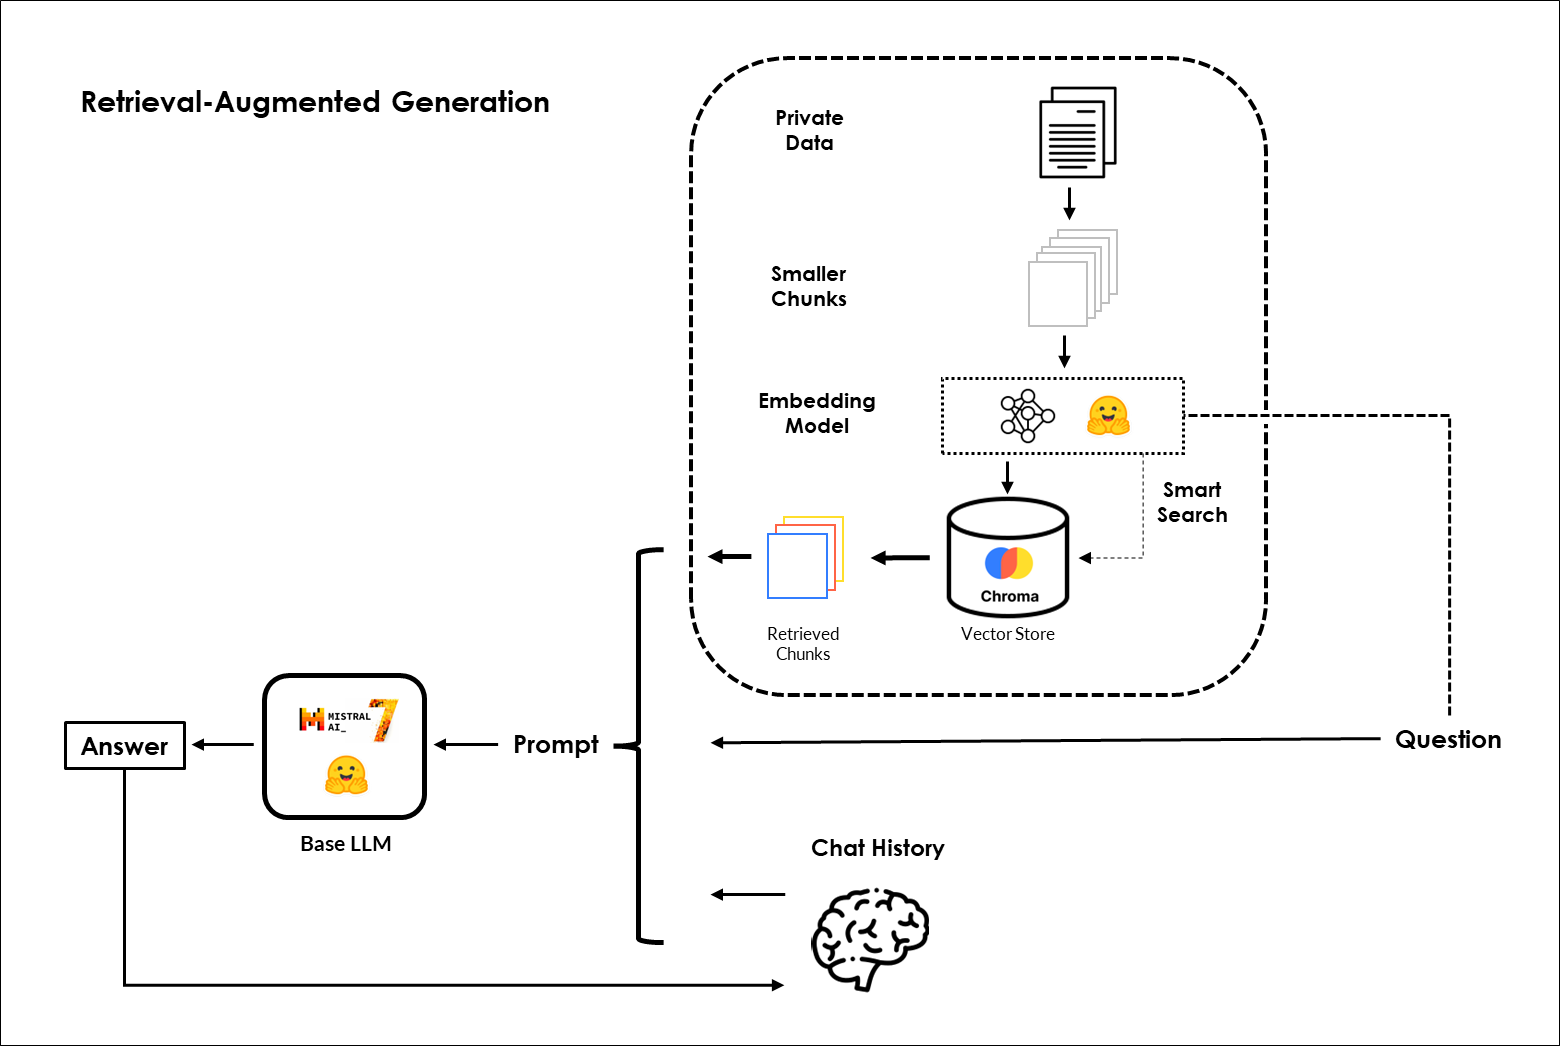

#### Installations

These lines of code are installing several **Python libraries** and **packages** using the **pip** package manager, and the **--quiet** flag is used to reduce the amount of output displayed during the installation process, making it less verbose

In [ ]:
!pip install gradio --quiet
!pip install xformer --quiet
!pip install chromadb --quiet
!pip install langchain --quiet
!pip install accelerate --quiet
!pip install transformers --quiet
!pip install bitsandbytes --quiet
!pip install unstructured --quiet
!pip install sentence-transformers --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 19.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.1/275.1 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 27.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 41.3 MB/s eta 

#### Imports

In the following script, we import a wide range of **libraries** and **modules** for advanced natural language processing and text generation tasks. Essentially, we are setting up an environment for working with language models, including **Hugging Face** models, as well as various tools and utilities for handling and processing text data

We mainly import **PyTorch** for deep learning capabilities and **Gradio** for building interactive ML model interfaces. Additionally, we import modules from the **langchain** library, which include templates for creating prompts, various chain models for language understanding and generation, text embeddings, and document loaders. Our code also integrates the powerful **Transformers** library, which allows for seamless use of **Hugging Face's state-of-the-art models** for a wide range of NLP applications.

In [ ]:
import torch
import gradio as gr

from textwrap import fill
from IPython.display import Markdown, display

from langchain.prompts.chat import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
    SystemMessagePromptTemplate,
    )

from langchain import PromptTemplate
from langchain import HuggingFacePipeline

from langchain.vectorstores import Chroma
from langchain.schema import AIMessage, HumanMessage
from langchain.memory import ConversationBufferMemory
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.document_loaders import UnstructuredMarkdownLoader, UnstructuredURLLoader
from langchain.chains import LLMChain, SimpleSequentialChain, RetrievalQA, ConversationalRetrievalChain

from transformers import BitsAndBytesConfig, AutoModelForCausalLM, AutoTokenizer, GenerationConfig, pipeline

import warnings
warnings.filterwarnings('ignore')

#### Base LLM

**Mistral-7b** developed by **Mistral AI** is taking the Open Source LLM landscape by storm. This new open-source LLM outperforms LLaMA-2 on many benchmarks, as illustrated in the following image taken from its paper:

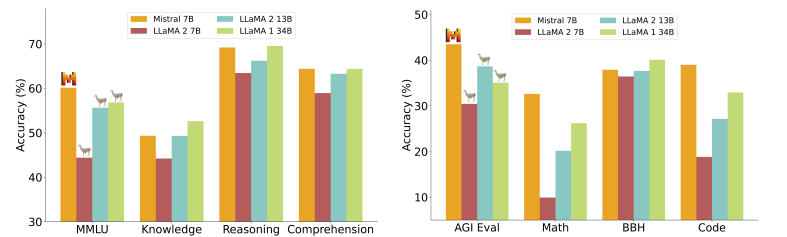

 The following code snippet sets up a **text generation pipeline** using a base LLM, **Mistral-7b** developed by **Mistral AI**, instruct pre-trained language model, configures it with **quantization** settings, **tokenization**, and **generation parameters**, and creates a pipeline that can be used for generating text based on the **Mistral-7b** LLM and configurations. Let's break down what's happening:

* **`quantization_config = BitsAndBytesConfig(...)`**: Here, a **quantization** configuration is defined using the **BitsAndBytesConfig**. Quantization is a technique used to reduce the memory and computation requirements of deep learning models, typically by using **fewer bits**, **4 bits** in our case to represent model parameters.

* **`tokenizer = AutoTokenizer.from_pretrained(...)`**: This line initializes a tokenizer for the **Mistral-7b** model, allowing you to preprocess text data for input to the model.

* **`model = AutoModelForCausalLM.from_pretrained(...)`**: This initializes the pre-trained language **Mistral-7b** model for causal language modeling. The model is configured with various parameters, including the **quantization** **configuration**, which was set earlier.

* **`generation_config = GenerationConfig.from_pretrained(...)`**: A **generation configuration** is created for the model, specifying various generation-related settings, such as the **maximum number of tokens**, **temperature** for **sampling**, **top-p sampling**, and **repetition penalty**.

* **`pipeline = pipeline(...)`**: Finally, a text generation pipeline is created using the **pipeline** function. This pipeline is set up for text generation, and it takes the pre-trained model, tokenizer, and generation configuration as inputs. It's configured to return full text outputs.

In [ ]:
MODEL_NAME = "mistralai/Mistral-7B-Instruct-v0.1"

quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_use_double_quant=True,
)

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME, use_fast=True)
tokenizer.pad_token = tokenizer.eos_token

model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME, torch_dtype=torch.float16,
    trust_remote_code=True,
    device_map="auto",
    quantization_config=quantization_config
)

generation_config = GenerationConfig.from_pretrained(MODEL_NAME)
generation_config.max_new_tokens = 1024
generation_config.temperature = 0.0001
generation_config.top_p = 0.95
generation_config.do_sample = True
generation_config.repetition_penalty = 1.15

pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    return_full_text=True,
    generation_config=generation_config,
)

**HuggingFacePipeline** is a class that allows you to run Hugging Face models locally. It is used to access and utilize a wide range of pre-trained ML models hosted on the Hugging Face Model Hub. In our case, we will use it within our LangChain environment to interact with Hugging Face models as a **local wrapper**. However, when working with the HuggingFacePipeline, the installation of **xformer** is recommended for more memory-efficient attention implementation. This why we have installed it above!

In [ ]:
llm = HuggingFacePipeline(
    pipeline=pipeline,
    )

Let's have some fun! Before connecting our base LLM, **Mistral-7b**, to our private data. First, let's ask it some general questions. Of course, it will respond based on the general knowledge it acquired during pre-training.

In [ ]:
query = "Explain the difference between ChatGPT and open source LLMs in a couple of lines."
result = llm(
    query
)

display(Markdown(f"<b>{query}</b>"))
display(Markdown(f"<p>{result}</p>"))

<b>Explain the difference between ChatGPT and open source LLMs in a couple of lines.</b>

<p>
ChatGPT is a proprietary model developed by OpenAI, while open source LLMs are models that are made available for anyone to use, modify, and distribute under an open-source license.</p>

**Very powerful!** Indeed, what would happen if we asked it a question for which it might lack knowledge because it probably would not have encountered it during its pre-training phase? I am referring to the GenIA Ecosystem implemented by Hiberus.

In [ ]:
query = "What is Hiberus GenIA Ecosystem?"
result = llm(
    query
)

display(Markdown(f"<b>{query}</b>"))
display(Markdown(f"<p>{result}</p>"))

<b>What is Hiberus GenIA Ecosystem?</b>

<p>
A: Hiberus GenIA Ecosystem refers to the entire ecosystem that supports and enables the development, deployment, and operation of Hiberus GenIA applications. This includes a wide range of components such as hardware, software, networking infrastructure, data storage, security, analytics, and more. The ecosystem also includes various tools and services that help developers build, test, deploy, and manage their applications.</p>

**Disappointed!** This is not the expected answer. The GenIA Ecosystem is even cooler than that, and this is because Mistral-7b LLM has never seen any information about the GenIA ecosystem during its pre-training. I promise to walk you through obtaining the correct answer in the upcoming sections.

#### Embeddings

After setting our base LLM, it is time to set an **embedding model**. As you know, each document should be converted into an **embedding vector** to enable semantic search using the user's query, which should also be embedded. To achieve this, we will utilize the embedding model **GTE** trained by **Alibaba DAMO Academy** and hosted on Hugging Face. It's worth noting that this model is both **free** and **powerful**. To get our task done, we will use the **HuggingFaceEmbeddings** class, a local pipeline wrapper for interacting with the GTE model hosted on Hugging Face Hub.

In [ ]:
embeddings = HuggingFaceEmbeddings(
    model_name="thenlper/gte-large",
    model_kwargs={"device": "cuda"},
    encode_kwargs={"normalize_embeddings": True},
)

#### Prompt Template

Did you know that we can give our base LLM an identity and make it behave according to our preferences, controlling the model's output without explicitly specifying everything in the user's query or prompt? This is achieved through **prompt templates**, which are pre-defined recipes for generating prompts for language models. In other contexts, giving an LLM an identity can be done through a **System Message** instead.

We use **PromptTemplate** to create a structured prompt. A template may include **instructions**, **n-shot examples**, and **specific context** and questions suitable for a particular task.

In [ ]:
template = """
[INST] <>
Act as a Machine Learning engineer who is teaching high school students.
<>

{text} [/INST]
"""

prompt = PromptTemplate(
    input_variables=["text"],
    template=template,
)

In [ ]:
query = "Explain what are Deep Neural Networks in 2-3 sentences"
result = llm(prompt.format(text=query))

display(Markdown(f"<b>{query}</b>"))
display(Markdown(f"<p>{result}</p>"))

<b>Explain what are Deep Neural Networks in 2-3 sentences</b>

<p>Deep neural networks (DNN) are a type of artificial intelligence model that simulates the structure and function of the human brain. They consist of multiple layers of interconnected nodes, or neurons, that process information by passing it through successive layers until an output is generated. DNNs can be trained on large amounts of data to recognize patterns and make predictions, making them useful for tasks such as image recognition, speech recognition, and natural language processing.</p>

#### Data Loading

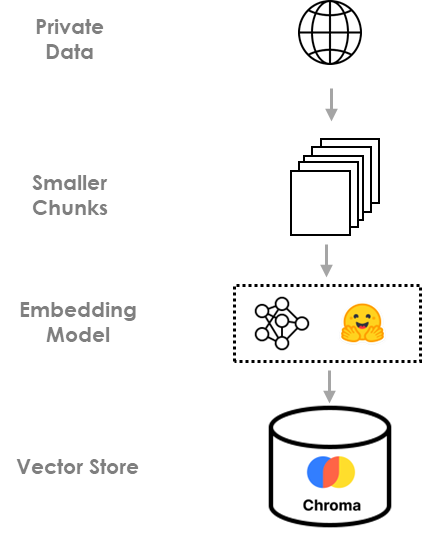

To obtain the accurate answer to our previous question, **`What is the Hiberus GenIA Ecosystem?`** we will have to connect our LLM with information about the GenIA Ecosystem.

We're in luck! There are two webpages that hold the key to understanding the GenIA Ecosystem. These **web pages** 🌐 can be found right on the Hiberus website. They're like treasure troves of information, offering in-depth insights into this groundbreaking ecosystem recently launched by Hiberus.

Now, you might be wondering how to proceed with this data-loading mission. Fortunately, we have a script that's up to the task. Let's take a look at it: The **`UnstructuredURLLoader`** is your magic wand for obtaining the information you seek. Once you run this script, you'll have a **collection of documents** at your disposal, each holding a piece of the GenIA puzzle. Basically, two documents, one for each link.

In [ ]:
urls = [
    "https://www.hiberus.com/expertos-ia-generativa-ld",
    "https://www.hiberus.com/en/experts-generative-ai-ld"
]

loader = UnstructuredURLLoader(urls=urls)
documents = loader.load()

len(documents)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


2

We've got two hefty documents overflowing with data, and that might just stretch our Mistral-7b LLM's **context window**. To keep everything in check, we're breaking them into **21 smaller documents** or **chunks**, each with a **1024-token** limit. Additionally, we've set the **chunk overlap** size to **64** to ensure there's some context continuity between consecutive chunks. Stay tuned for the next step in managing this data adventure!

In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1024, chunk_overlap=64)
texts_chunks = text_splitter.split_documents(documents)

len(texts_chunks)

21

#### Data Ingestion

After we've got our manageable data chunks, the next step is to embed and index them in **Chromdb**, our **vector store**. The best part? It's a breeze and can be accomplished with just a single line of code!

In [ ]:
db = Chroma.from_documents(texts_chunks, embeddings, persist_directory="db")

Once our data is indexed, in the script below, we tweak our prompt template to match our needs and give our RAG model the persona of a Marketing Manager Expert!

Moreover, to combine our LLM with the vector database retrieval capabilities, we use the crucial chaining component **RetrievalQA** with **`k=2`**. This setup ensures that the retriever outputs two relevant chunks, which are then used by the LLM to formulate the answer when a question is presented.

In [ ]:
template = """
[INST] <>
Act as an Hiberus marketing manager expert. Use the following information to answer the question at the end.
<>

{context}

{question} [/INST]
"""

prompt = PromptTemplate(template=template, input_variables=["context", "question"])

qa_chain = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever(search_kwargs={"k": 2}),
    return_source_documents=True,
    chain_type_kwargs={"prompt": prompt},
)

#### Querying

Awesome! Our RAG system is all set to answer your questions. So, let's dive in and ask it some questions - including the one we missed earlier, just in case you've forgotten it. Let's have some fun!

In [ ]:
query = "What is GenAI Ecosystem?"
result_ = qa_chain(
    query
)
result = result_["result"].strip()


display(Markdown(f"<b>{query}</b>"))
display(Markdown(f"<p>{result}</p>"))

<b>What is GenAI Ecosystem?</b>

<p>GenIA Ecosystem is an integrated set of technologies, tools, services, and resources that allows businesses to harness the power of generative AI for content generation, AI-assisted design, process optimization, or automated decision making. It offers various solutions such as h-smart Conversational, which helps develop and implement custom chatbots with advanced natural language processing and generation capabilities, as well as security protocols to ensure the protection of interactions; h-complex Data, which enables classification and extraction of data from documents, analysis of construction regulatory compliance, management of incidents, and makes personalized recommendations based on the type of user; and h-content Generation, which generates code from textual descriptions, detects offensive images or images with the potential to be offensive in e-commerce, and generates content through LLM models.</p>

In [ ]:
query = "Why Hiberus has created GenAI Ecosystem?"
result_ = qa_chain(
    query
)
result = result_["result"].strip()


display(Markdown(f"<b>{query}</b>"))
display(Markdown(f"<p>{result}</p>"))

<b>Why Hiberus has created GenAI Ecosystem?</b>

<p>Hiberus has created GenIA Ecosystem to address the challenges faced by businesses when implementing AI technology. The ecosystem includes a range of tools, services, and resources designed to help companies harness the power of generative AI for various purposes, including content generation, AI-assisted design, process optimization, and automated decision making. By providing tailored solutions and support, training, and consulting services, Hiberus aims to help businesses overcome the lack of understanding and technical skills required to develop and maintain AI systems, as well as addressing ethical and regulatory issues related to AI.</p>

No comments! We've got great answers for both questions, including the one we missed earlier. It should be noted that we can print the **source documents** or **reference documents** from which the LLM has generated the answers. The stage now is yours; consider the following line as the starting point for your exploration.

In [ ]:
result_["source_documents"]

#### Follow-Up Q/A

In real-world scenarios, follow-up chat is useful, especially with conversational AI assistants. It enables users to engage in natural conversations with the model, while retaining chat history in the model's context. This means users can implicitly refer to something they have discussed in previous chat messages or bring up topics you've chatted about in the past. It's like having a friendly chat with a helpful AI buddy! 🗨️💬

To make this happen, we first make a few tweaks to the prompt template. Then, we use **`ConversationBufferMemory`** for storing the conversation in-memory and then retrieving the messages later on. Finaly, then employ the chaining component, **`ConversationalRetrievalChain`** to combine our LLM, Mistral-7b, with the vector database and chat history. This is in order to enhance the user conversation experience!

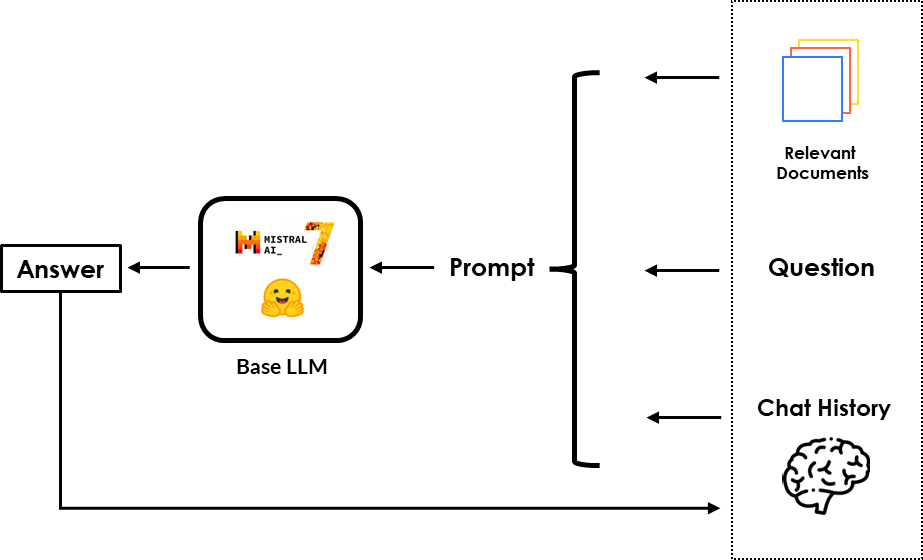

In [ ]:
custom_template = """You are an Hiberus Marketing Manager AI Assistant. Given the
following conversation and a follow up question, rephrase the follow up question
to be a standalone question. At the end of standalone question add this
'Answer the question in English language.' If you do not know the answer reply with 'I am sorry, I dont have enough information'.
Chat History:
{chat_history}
Follow Up Input: {question}
Standalone question:
"""

CUSTOM_QUESTION_PROMPT = PromptTemplate.from_template(custom_template)

memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

qa_chain = ConversationalRetrievalChain.from_llm(
    llm=llm,
    retriever=db.as_retriever(search_kwargs={"k": 2}),
    memory=memory,
    condense_question_prompt=CUSTOM_QUESTION_PROMPT,
)

In [ ]:
query = "Who you are?"
result_ = qa_chain({"question": query})
result = result_["answer"].strip()

display(Markdown(f"<b>{query}</b>"))
display(Markdown(f"<p>{result}</p>"))

<b>Who you are?</b>

<p>We are experts in generative AI.</p>

In [ ]:
query = "What do you do?"
result_ = qa_chain({"question": query})
result = result_["answer"].strip()

display(Markdown(f"<b>{query}</b>"))
display(Markdown(f"<p>{result}</p>"))

<b>What do you do?</b>

<p>Our company helps various sectors such as banking, insurance and healthcare to improve their operations, reduce costs, increase efficiency and productivity, and generate new business opportunities through the use of artificial intelligence (AI) and machine learning (ML). We also help them to develop innovative products and services, make data-driven decisions, and improve customer service.</p>

In [ ]:
query = "What is GenIA Ecosystem?"

result_ = qa_chain({"question": query})
result = result_["answer"].strip()

display(Markdown(f"<b>{query}</b>"))
display(Markdown(f"<p>{result}</p>"))

<b>What is GenIA Ecosystem?</b>

<p>GenIA Ecosystem is an integrated set of technologies, tools, services and resources that allow you to harness the power of generative AI for content generation, AI-assisted design, process optimization or automated decision making.</p>

In [ ]:
query = "Why it has been created?"

result_ = qa_chain({"question": query})
result = result_["answer"].strip()

display(Markdown(f"<b>{query}</b>"))
display(Markdown(f"<p>{result}</p>"))

<b>Why it has been created?</b>

<p>GenIA Ecosystem was created to address business challenges faced with AI by providing tailored solutions and support and advisory, training and consulting services.</p>

If you're still unsure about your chat history, you can run these code snippets to take a look at your questions in **HumanMessages** and the model responses in **AIMessages**. This will give you a clear view of the conversation and help address any doubts you might have. It's a handy way to keep track of the interaction! 🕵️‍♂️💬

In [ ]:
memory.chat_memory.messages

### **Gradio Chat UI**


**Gradio** is your speedy ticket to **demo** your RAG model with a user-friendly web interface that anyone can access from anywhere! Here's how it works: we've set up a nifty function called **`querying()`**. It takes the **`query`** as its main input, along with a cleverly named fake argument called **`history`** to resolve a minor issue. When you fire up this function, it returns the response generated by our superstar model, Mistral-7b. It's as simple as that! 🚀

In [ ]:
def querying(query, history):
  memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)

  qa_chain = ConversationalRetrievalChain.from_llm(
      llm=llm,
      retriever=db.as_retriever(search_kwargs={"k": 2}),
      memory=memory,
      condense_question_prompt=CUSTOM_QUESTION_PROMPT,
  )

  result = qa_chain({"question": query})
  return result["answer"].strip()

In [ ]:
iface = gr.ChatInterface(
    fn = querying,
    chatbot=gr.Chatbot(height=600),
    textbox=gr.Textbox(placeholder="What is GenAI Ecosystem?", container=False, scale=7),
    title="HiberusBot",
    theme="soft",
    examples=["Why Hiberus has created GenAI Ecosystem?",
              "What is GenAI Ecosystem?"],

    cache_examples=True,
    retry_btn="Repetir",
    undo_btn="Deshacer",
    clear_btn="Borrar",
    submit_btn="Enviar"

    )

iface.launch(share=True)

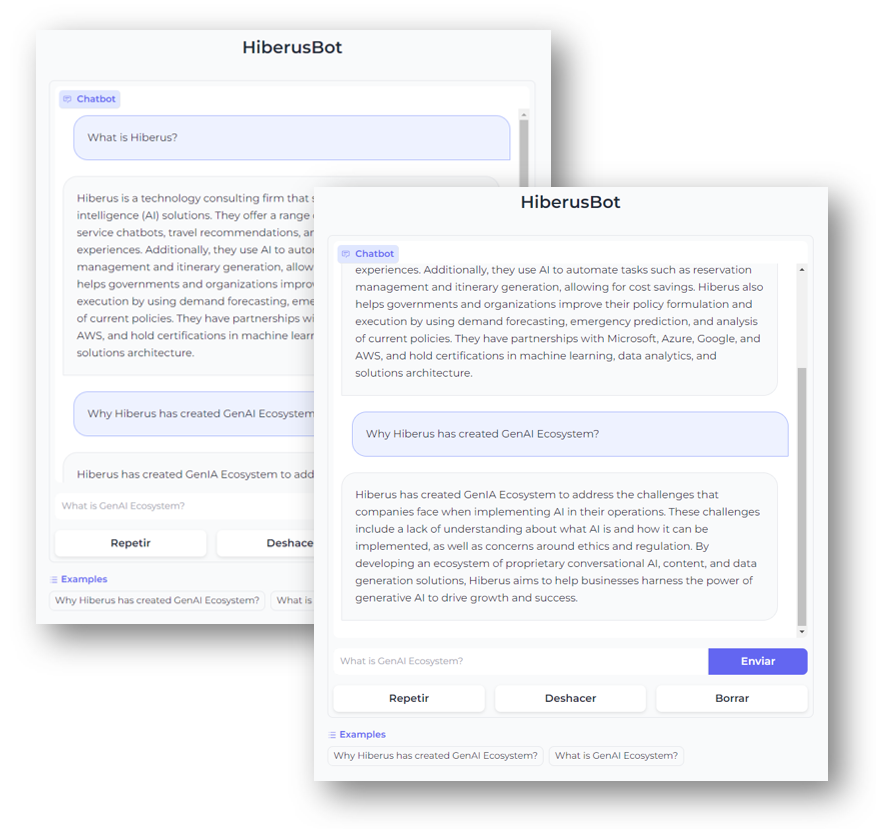

### **Conclusion**

**RAG** applications are turning the AI landscape upside down, thanks to the leaps made by large language models. Tools like LangChain, LlamaIndex, and similar frameworks are paving the way for swift development of applications that tap into the full potential of LLMs. This includes **augmenting** ang enhancing LLMs' knowledge with private data like **PDFs**, **URLs**, **videos**, and more, data that they've never encountered during their initial training.

Indeed, we haven't mentioned that you can also create a RAG application using data from the entire internet, not just a few links or web pages? You can achieve this by first employing a **retriever** to dynamically fetch relevant web pages from the internet, making use of **Google Search APIs**, for instance, or any other alternative. Then, you can use a **re-ranker** to sort and rank the content from all the retrieved web pages, providing the LLM with the relevant context needed to generate the perfect answer for a given query.

The exciting part? RAG can be also securely implemented within the cloud. You've got options like **OpenAI On Your Data** within **Azure**, **Amazon Bedrock**, and a whole array of services in **GCP**. It's a revolution in AI with limitless possibilities! 🚀💻.

Stay tuned, and see you soon! 📻👋😊

___

En [Hiberus Tecnología](https://www.hiberus.com/) creemos que la IA se va a convertir en una herramienta imprescindible en todos los campos y sectores en un futuro próximo. Por eso hemos creado la [newsletter Behind the AI](https://www.hiberus.com/behind-ai-ld) en la que te contamos todas las novedades y hechos relevantes que debes conocer para no perderte nada sobre Inteligencia Artificial.

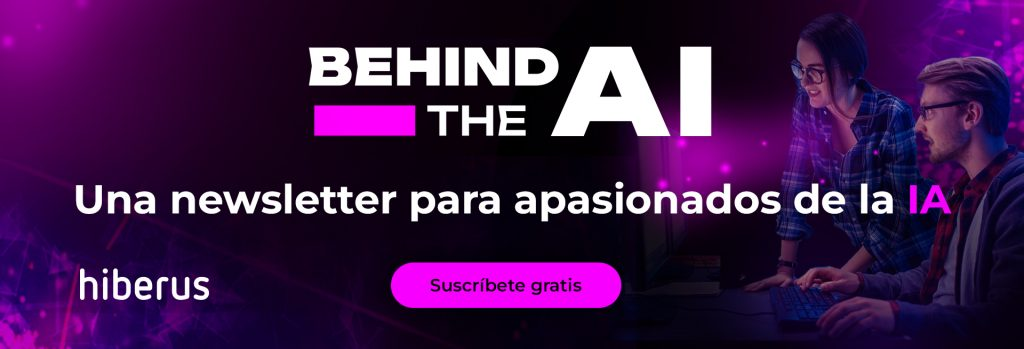